In [2]:
import pandas as pd
import numpy as np
df1 = pd.read_csv('C:/Users/iamda/Downloads/ml/Movie-Rec/Movie-Recommendation-System/tmdb_5000_credits.csv/tmdb_5000_credits.csv')

df2 = pd.read_csv('C:/Users/iamda/Downloads/ml/Movie-Rec/Movie-Recommendation-System/tmdb_5000_movies.csv/tmdb_5000_movies.csv')


In [3]:
df1.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [4]:
df2.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
df1.columns = ['id','title','cast','crew']
df2= df2.merge(df1,on='id')

# Demographic based filtering

In [6]:
C=df2['vote_average'].mean()
C

6.092171559442016

In [7]:
m= df2['vote_count'].quantile(0.9)
m

1838.4000000000015

In [8]:
q_movies = df2.copy().loc[df2['vote_count'] >= m]
q_movies.shape

(481, 23)

In [9]:
def weighted_rating(x,m=m,C=C):
    v=x['vote_count']
    R=x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [10]:
q_movies['score']=q_movies.apply(weighted_rating,axis=1)
q_movies.rename(columns={'title_x':'title'},inplace=True)
q_movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew,score
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.050669
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.665696
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.239396
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",7.346721
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",6.096368


In [11]:
q_movies=q_movies.sort_values('score',ascending=False)
q_movies[['title','vote_count','vote_average','score']].head(10)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


**to check the trending movies**

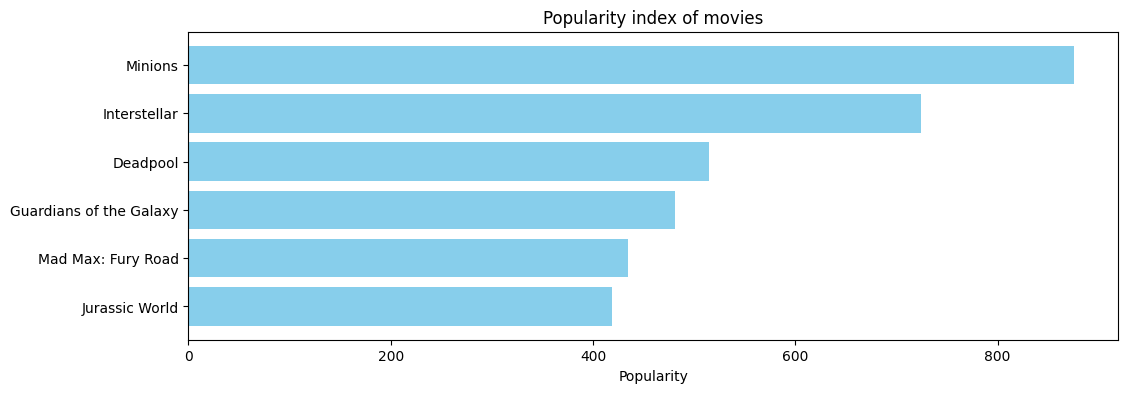

In [12]:
pop=df2.sort_values('popularity',ascending=False)

import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.barh(pop['title'].head(6),pop['popularity'].head(6),color='skyblue',align='center')
plt.gca().invert_yaxis()
plt.xlabel('Popularity')
plt.title("Popularity index of movies")
plt.show()

# Content based filtering

**PLOT DESCRIPTION BASED**

In [13]:
df2['overview'].head(10)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
5    The seemingly invincible Spider-Man goes up ag...
6    When the kingdom's most wanted-and most charmi...
7    When Tony Stark tries to jumpstart a dormant p...
8    As Harry begins his sixth year at Hogwarts, he...
9    Fearing the actions of a god-like Super Hero l...
Name: overview, dtype: object

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(stop_words='english')
df2['overview']=df2['overview'].fillna(' ')
tfidf_matrix = tfidf.fit_transform(df2['overview'])
tfidf_matrix.shape

(4803, 20978)

In [15]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim=linear_kernel(tfidf_matrix,tfidf_matrix)

In [16]:
indices=pd.Series(df2.index,index=df2['title']).drop_duplicates()

In [17]:
def get_recommendation(title,cosine_sim=cosine_sim):
    idx=indices[title]
    sim_scores=list(enumerate(cosine_sim[idx]))
    sim_scores=sorted(sim_scores,key=lambda x:x[1],reverse=True)
    sim_scores=sim_scores[1:11]
    movie_indices=[i[0] for i in sim_scores]
    return df2['title'].iloc[movie_indices]

In [18]:
get_recommendation('The Dark Knight')

3                         The Dark Knight Rises
428                              Batman Returns
3854    Batman: The Dark Knight Returns, Part 2
299                              Batman Forever
1359                                     Batman
119                               Batman Begins
1181                                        JFK
9            Batman v Superman: Dawn of Justice
2507                                  Slow Burn
210                              Batman & Robin
Name: title, dtype: object

**CREDITS, GENRE, KEYWORDS BASED**

In [19]:
df2['crew'].head(3)

0    [{"credit_id": "52fe48009251416c750aca23", "de...
1    [{"credit_id": "52fe4232c3a36847f800b579", "de...
2    [{"credit_id": "54805967c3a36829b5002c41", "de...
Name: crew, dtype: object

In [20]:
from ast import literal_eval
df2=df2.fillna(" ")

In [21]:
features = ['cast', 'crew', 'keywords', 'genres','production_companies']
for feature in features:
    df2[feature] = df2[feature].apply(literal_eval)

In [22]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan    
        

In [23]:
def get_list(x):
    if isinstance(x,list):
        names=[i['name'] for i in x]

        if len(names)>3:
            names=names[:3]
        return names
    return []    
        

In [ ]:
df2['director']=df2['crew'].apply(get_director)

features=['cast','keywords','genres','production_companies']
for feature in features:
    df2[feature]=df2[feature].apply(get_list)

In [25]:
df2[['title','director','cast','keywords','genres','production_companies']].head(3)

,title,director,cast,keywords,genres,production_companies
0,Avatar,James Cameron,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[culture clash, future, space war]","[Action, Adventure, Fantasy]","[Ingenious Film Partners, Twentieth Century Fo..."
1,Pirates of the Caribbean: At World's End,Gore Verbinski,"[Johnny Depp, Orlando Bloom, Keira Knightley]","[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]","[Walt Disney Pictures, Jerry Bruckheimer Films..."
2,Spectre,Sam Mendes,"[Daniel Craig, Christoph Waltz, Léa Seydoux]","[spy, based on novel, secret agent]","[Action, Adventure, Crime]","[Columbia Pictures, Danjaq, B24]"


In [26]:
def clean_data(x):
    if isinstance(x,list):
        return [str.lower(i.replace(" ","")) for i in x]
    else:
        if isinstance(x,str):
            return str.lower(x.replace(" ",""))
        else:
            return ''

In [ ]:
features=['title','cast','director','keywords','genres','production_companies']

for feature in features:
    df2[feature]=df2[feature].apply(clean_data)

In [ ]:
def create_soup(x):
    return (
        (' '.join([x['title']])) + ' ' +  
        ' '.join(x['keywords']) + ' ' +
        ' '.join(x['cast']) + ' ' +
        x['director'] + ' ' +
        ' '.join(x['genres']) + ' ' +
        ' '.join(x['production_companies'])
    )

df2['soup']=df2.apply(create_soup,axis=1)

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
count=CountVectorizer(stop_words='english')
count_matrix=count.fit_transform(df2['soup'])

In [48]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim2=cosine_similarity(count_matrix,count_matrix)
import pickle

with open('cosine_sim.pkl', 'wb') as f:
    pickle.dump(cosine_sim2, f)


In [43]:
df2 = df2.reset_index()
indices = pd.Series(df2.index,index=df2['title'])

ValueError: cannot insert level_0, already exists

In [57]:
movies_dict=pickle.load(open('movies_dict.pkl','rb'))

movies=pd.DataFrame(movies_dict)
movies['soup'] = df2['soup']
with open('movies_dict.pkl', 'wb') as f:
    pickle.dump(movies, f)

# def get_recommendation(title,cosine_sim2=cosine_sim2):
#     idx=indices[title]
#     rec_movies=[]
#     rec_posters=[]
#     sim_scores=list(enumerate(cosine_sim2[idx]))
#     sim_scores=sorted(sim_scores,key=lambda x:x[1],reverse=True)
#     sim_scores=sim_scores[1:11]
#     for i in sim_scores:
#         movie_id=movies['id'].iloc[i[0]]
#         # rec_posters.append(fetch_poster(movie_id))
#         rec_movies.append(movies['title'].iloc[i[0]])
#     return rec_movies   
# recmovies = []
# recmovies = get_recommendation('The Dark Knight Rises',cosine_sim2)

# Collaborative filtering

In [ ]:
from surprise import Reader, Dataset, SVD
reader=Reader()
ratings=pd.read_csv("C:/Users/iamda/Downloads/ml/Movie-Rec/ratings_small.csv/ratings_small.csv")

ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [ ]:
data=Dataset.load_from_df(ratings[['userId','movieId','rating']],reader)

In [ ]:
from surprise.model_selection import cross_validate
svd=SVD()
cross_validate(svd, data, measures=["rmse", "mae"], cv=5)

{'test_rmse': array([0.89511549, 0.90069153, 0.89577761, 0.8933402 , 0.89705213]),
 'test_mae': array([0.68980773, 0.69345978, 0.69046939, 0.68765092, 0.69134286]),
 'fit_time': (1.17240309715271,
  1.1731314659118652,
  1.1903269290924072,
  1.1727981567382812,
  1.120354175567627),
 'test_time': (0.1297130584716797,
  0.12120628356933594,
  0.1317603588104248,
  0.12645459175109863,
  0.12871026992797852)}

In [ ]:
trainset = data.build_full_trainset()
svd.fit(trainset)

In [ ]:
ratings[ratings['userId']==1]

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
5,1,1263,2.0,1260759151
6,1,1287,2.0,1260759187
7,1,1293,2.0,1260759148
8,1,1339,3.5,1260759125
9,1,1343,2.0,1260759131


In [ ]:
svd.predict(1,302,3)

Prediction(uid=1, iid=302, r_ui=3, est=2.7774073594035293, details={'was_impossible': False})

In [ ]:
import pickle
pickle.dump(df2,open('movies.pkl','wb'))

In [ ]:
pickle.dump(df2.to_dict(),open('movies_dict.pkl','wb'))

In [ ]:
pickle.dump(cosine_sim2,open('cosine_sim.pkl','wb'))